In [14]:
from sympy import symbols
from sympy import fraction, poly, exp, log
from sympy import tan, acosh, sqrt, ceiling, I, Abs, atan, re, im
from sympy.interactive import printing
printing.init_printing(use_latex = True)
from control.matlab import zero, pole, bode, tf
import numpy as np


from scipy.signal import freqz,freqs

import matplotlib.pyplot as plt

In [15]:
FT = 205000 #Hz
FP = 80000 #Hz
FS = 50000 #Hz
AMAX = 0.25 #dB
AMIN = 40 #dB
PI = 3.141592653589792328462643383279502

Ft, Fp, Fs, Amax, Amin, s = symbols('Ft Fp Fs Amax Amin s')


#Convert to radians per seconds:
Wp, Ws = symbols('Wp Ws')

W_p = (2*PI*Fp)/Ft
Wp = W_p.subs(Fp,FP).subs(Ft,FT)
W_s = (2*PI*Fs)/Ft
Ws = W_s.subs(Fs,FS).subs(Ft,FT)

display("Wp:", Wp, "Ws:", Ws)



'Wp:'

'Ws:'

'Omegap:'

'Omegas:'

'n:'

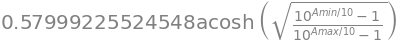

In [16]:

#Pre-warp/normalise to Low Pass
Omega_p, Omega_s = symbols('Omegap Omegas')

Omega_dp = tan(Wp/2)
Omega_ds = tan(Ws/2)
Omega_p = Omega_ds
Omega_s = Omega_dp

display("Omegap:", Omega_p, "Omegas:", Omega_s)


#Find order of filter

n = (acosh(sqrt((10**(Amin/10)-1)/(10**(Amax/10)-1))))/(acosh(Omega_s/Omega_p))

display("n:", n)

nAnswer = n.subs([(Amax, AMAX), (Amin, AMIN), (Ft, FT), (Fp, FP), (Fs, FS)])

display(nAnswer.evalf())
display(ceiling(nAnswer.evalf()))



Low pass filter function


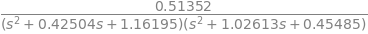



High Pass Filter function


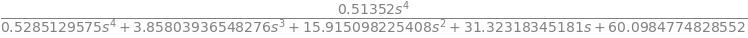



Numerator: [0.51352]
Denomenator: [0.5285129574999999, 3.8580393654827647, 15.915098225408036, 31.323183451810017, 60.09847748285518]


Poles:


array([-3.14065374+2.67954857j, -3.14065374-2.67954857j,
       -0.50924671+2.53228896j, -0.50924671-2.53228896j])

Zeros:


array([0., 0., 0., 0.])

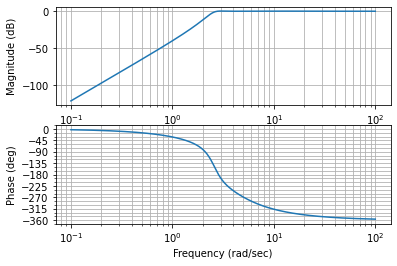

In [17]:
Hlps_func = symbols('Hlps')

#Hlps = (s*s + 0.27005*s + 1.09543)(s*s + 0.707*s + 0.53642)(s + 0.43695) n=5
#Hlps = (1.02702)/((s*s + 0.76722*s + 1.33863)* (s + 0.76722))  #n=3
Hlps_func = (0.51352)/((s*s + 0.42504*s + 1.16195) * (s*s + 1.02613*s + 0.45485)) #n=4

print("Low pass filter function")
display(Hlps_func)

#Hhps = symbols('Hhps')
#Substitute equation 10 into the transfer function
Hhps = Hlps_func.subs(s, Omega_dp/s).subs(Fs, FS).subs(Ft, FT)
print("\n\nHigh Pass Filter function")
Hhps_ex = Hhps.expand()
Hhps_sim = Hhps_ex.simplify()
display(Hhps_sim)

################################
nume,deno = fraction(Hhps_sim)

a = poly(nume,s)
val_a = a.coeffs()
numarr = np.array(val_a, dtype='float')

num = [numarr[0]]

b = poly(deno,s)
val_b = b.coeffs()
numarrb = np.array(val_b,dtype='float')
lengthb = len(numarrb)
den = [numarrb[0],numarrb[1],numarrb[2],numarrb[3],numarrb[4]]

print("\n\nNumerator:",num)
print("Denomenator:",den)

Hhp_s = (nume/numarrb[0])/(deno/numarrb[0])
#display(Hhp_s)

#Plot the analog High Pass

nume = [0.51352,0,0,0,0]
G = tf(nume,den)
#display(G)

print("\n\nPoles:")
display(pole(G))
print("Zeros:")
display(zero(G))

#Plot the phase and magnitude
mag,phase, w = bode(G)
plt.show()


c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local

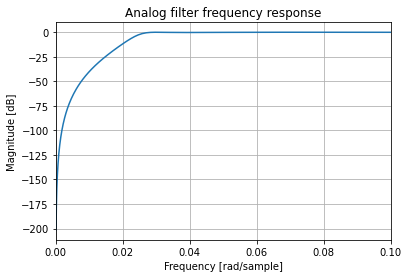

In [18]:
#Frequency sweep
w,h = freqs(nume,den)
h_dB = 20 * np.log10 (abs(h))
fig, ax1 = plt.subplots()
ax1.set_title('Analog filter frequency response')
ax1.plot(w/max(w),h_dB)
ax1.set_ylabel('Magnitude [dB]')
ax1.set_xlabel('Frequency [rad/sample]')
plt.grid()
plt.xlim(0,0.1)

c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local

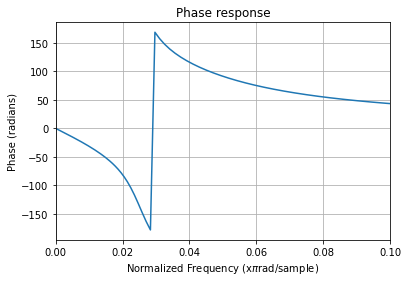

In [19]:
w,h = freqs(nume,den)
h_Phase = (180/PI)*(np.arctan2(np.imag(h),np.real(h)))
plt.plot(w/max(w),h_Phase)
plt.ylabel('Phase (radians)')
plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
plt.title(r'Phase response')
plt.subplots_adjust(hspace=1)
plt.grid()
plt.xlim(0,0.1)

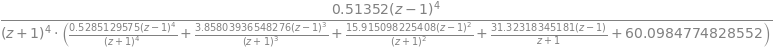

Simplified


'Digital Hhps:'

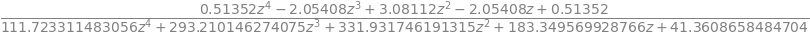

In [20]:
z = symbols('z')

Hhps_Digital = Hhps_sim.subs(s,(Ft*2*(z-1))/(z+1)).subs(Fs, FS).subs(Ft, 0.5)
display(Hhps_Digital)
Hhps_z = Hhps_Digital.simplify()
print("Simplified")
display("Digital Hhps:",Hhps_z)


Numerator: [0.51352, -2.05408, 3.08112, -2.05408, 0.51352]
Denomenator: [111.723311483056, 293.2101462740752, 331.931746191315, 183.34956992876624, 41.36086584847043]


TransferFunction(array([ 0.51352, -2.05408,  3.08112, -2.05408,  0.51352]), array([111.72331148, 293.21014627, 331.93174619, 183.34956993,
        41.36086585]))

'Poles'

array([-0.65265999+0.58278429j, -0.65265999-0.58278429j,
       -0.65955562+0.22031237j, -0.65955562-0.22031237j])

'Zeros'

array([1.00021915+0.j        , 0.99999998+0.00021913j,
       0.99999998-0.00021913j, 0.99978088+0.j        ])

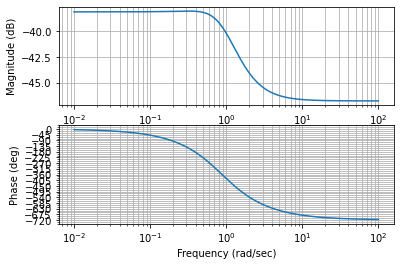

In [21]:
# Plot the Digital high pass
numera,denomer = fraction(Hhps_z)

ab = poly(numera,z)
val_ab = ab.coeffs()
numarr_ab = np.array(val_ab, dtype='float')
lengtha = len(numarr_ab)
#for i in range(length):
num_dig = [numarr_ab[0],numarr_ab[1],numarr_ab[2],numarr_ab[3],numarr_ab[4]]

bc = poly(denomer,z)
val_bc = bc.coeffs()
numarr_bc = np.array(val_bc,dtype='float')
lengthb = len(numarr_bc)
den_dig = [numarr_bc[0],numarr_bc[1],numarr_bc[2],numarr_bc[3],numarr_bc[4]]

print("Numerator:",num_dig)
print("Denomenator:",den_dig)
GA = tf(num_dig,den_dig)
display(GA)

display("Poles",pole(GA))
display("Zeros",zero(GA))

mag,phase, w = bode(GA)
plt.show()

c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDepreca

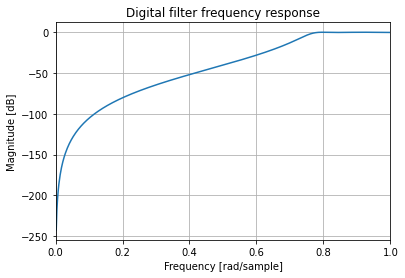

In [22]:
#Frequency sweep
w,h = freqz(num_dig,den_dig)
h_dB = 20 * np.log10 (abs(h))
fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w/max(w),h_dB)
ax1.set_ylabel('Magnitude [dB]')
ax1.set_xlabel('Frequency [rad/sample]')
plt.grid()
plt.xlim(0,1)

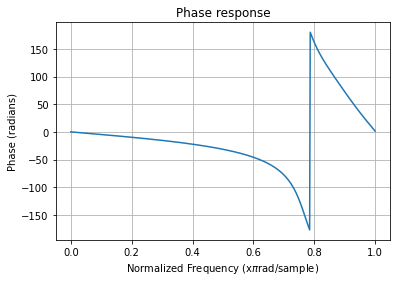

In [23]:
display(num_dig,den_dig)
w,h = freqz(num_dig,den_dig)
h_Phase = (180/PI)*(np.arctan2(np.imag(h),np.real(h)))
plt.plot(w/max(w),h_Phase)
plt.ylabel('Phase (radians)')
plt.xlabel(r'Normalized Frequency (x$\pi$rad/sample)')
plt.title(r'Phase response')
plt.subplots_adjust(hspace=0.5)
plt.grid()
#plt.xlim(0,100000)

c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\lib\latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
c:\Users\Conrad\AppData\Local

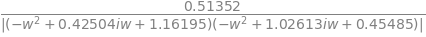

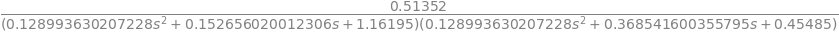

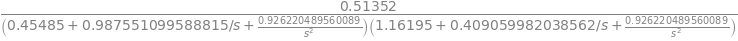

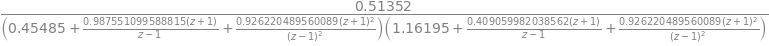

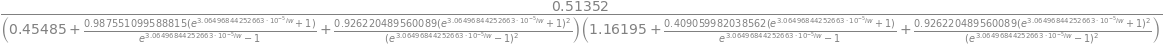

KeyboardInterrupt: 

In [24]:
#frequency response
#Analog 
z, w = symbols('z w')
Hhps_fre = Hlps_func.subs([(s, I*w), (Fs, FS), (Ft, FT)])
Hhps_mag = Abs(Hhps_fre)
display(Hhps_mag)

Hlp_s = Hlps_func.subs(s,(s/Omega_s))
display(Hlp_s)

Hhp_s_F = Hlp_s.subs(s,(Omega_p*Omega_s)/s)
display(Hhp_s_F)

Hdigital = Hhp_s_F.subs(s,(z-1)/(z+1))
display(Hdigital)

p = exp(I*w*(2*PI/FT))
display(p)
Func = Hdigital.subs(z,p)
display(Func)

Analog_mag = abs(20*log(abs(Func), 10))
#t = np.arange(100000)
#plt.plot(t,Analog_mag)

# display("Magnitude response", Hhps_mag)

# display("Phase response", atan(im(Hhps_fre)/re(Hhps_fre)).simplify().evalf())

data = []
for k in range(1, 100000, 100):
    data.append(Analog_mag.subs(w, k))


fig, ax = plt.subplots()
ax.plot(data)
ax.grid()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

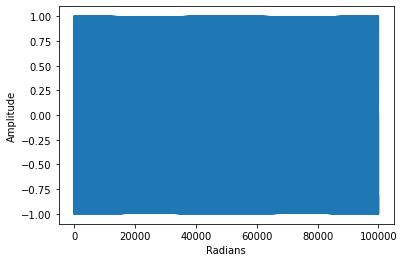

In [27]:
# generate signals
size = 100000
x = np.linspace(0,  size-1, size-1)
y = np.zeros(size-1)
f = 5000

for k in range(1, size-1):
    y[k] = np.sin(2*np.pi*f*x[k])

#plt.plot(x, y)
plt.xlabel('Radians')
plt.ylabel('Amplitude')
plt.show

out = [0]* len(x)
for k in range(4, len(x)):
    out[k] = 0.0046*x[k] - 0.0184*x[k-1] + 0.0276*x[k-2] - 0.0184*x[k-3] + 0.0046*x[k-4] -2.6244*out[k-1] -2.9710*out[k-2] - 1.6411*out[k-3] - 0.3702*out[k-4]


plt.plot(x, y)
plt.xlabel('Radians')
plt.ylabel('Amplitude')
plt.show